# Missing values, aplicando a Worl Happines Dataset
## Integrantes: Jorge Flores, Daniel Tinizaray
## Fecha: 20/07/2021

In [1]:
import os
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../proyect/kaggle_dataset/happines_decode.csv')
print(df.columns)
df.columns = ['country_name', 'year', 'life_ladder', 'log_per_capita',
       'social_supp', 'heal_life_expec_birth',
       'free_live_choices', 'generosity',
       'percep_corrup', 'pos_affect', 'neg_affect', 'id_country']

Index(['country_name', 'year', 'life_Ladder', 'gdp_per_capita', 'social_supp',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'Generosity', 'percept_of_corruption', 'postve_affect', 'negtve_affect',
       'country'],
      dtype='object')


### Detección de valores faltantes en el dataset:
    -.isnull()
    -.info()
    -Heatmap
    -Librería missingno
    -Bar graphs

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           1949 non-null   int64  
 1   year                   1949 non-null   int64  
 2   life_ladder            1949 non-null   float64
 3   log_per_capita         1913 non-null   float64
 4   social_supp            1936 non-null   float64
 5   heal_life_expec_birth  1894 non-null   float64
 6   free_live_choices      1917 non-null   float64
 7   generosity             1860 non-null   float64
 8   percep_corrup          1839 non-null   float64
 9   pos_affect             1927 non-null   float64
 10  neg_affect             1933 non-null   float64
 11  id_country             1949 non-null   object 
dtypes: float64(9), int64(2), object(1)
memory usage: 182.8+ KB


In [4]:
df.isnull() 

,country_name,year,life_ladder,log_per_capita,social_supp,heal_life_expec_birth,free_live_choices,generosity,percep_corrup,pos_affect,neg_affect,id_country
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,False,False,False,False,False,False,False,False,False,False,False,False
1945,False,False,False,False,False,False,False,False,False,False,False,False
1946,False,False,False,False,False,False,False,False,False,False,False,False
1947,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

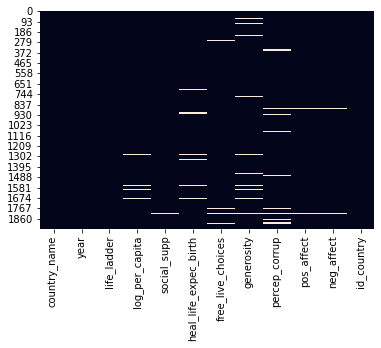

In [5]:
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

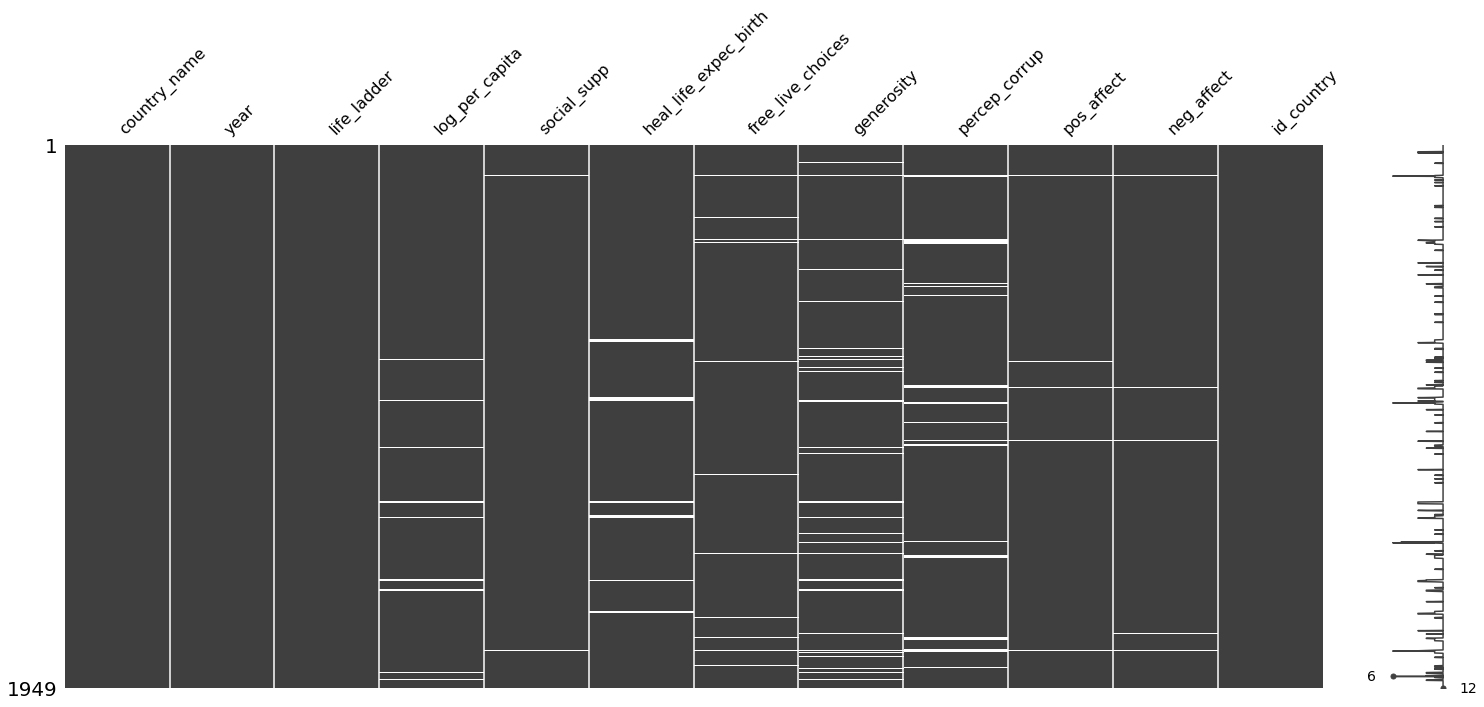

In [6]:
msno.matrix(df) 

In [7]:
df_sin_nulos = df.copy()
df_sin_nulos = df_sin_nulos.dropna()
# Conteo para verificar que se eliminaron los nulos
print(df.size)
print(df_sin_nulos.size)
df_pais = df_sin_nulos.groupby('country_name')[['log_per_capita']].mean()
#df_pais = pd.DataFrame(df_pais)
df_pais
print(type(df))

23388
20496
<class 'pandas.core.frame.DataFrame'>


In [8]:
df_pais['countries'] = list(df_pais.index)
df_pais

,log_per_capita,countries
country_name,,
1,7.650833,1
2,9.384385,2
3,9.329400,3
4,8.990000,4
5,10.033800,5
...,...,...
162,9.495273,162
163,8.647700,163
164,8.217143,164


In [9]:
df.log_per_capita.fillna(df['log_per_capita'].mean(), inplace=True)
df.social_supp.fillna(df['social_supp'].mean(), inplace=True)
df.heal_life_expec_birth.fillna(df['heal_life_expec_birth'].mean(), inplace=True)
df.free_live_choices.fillna(df['free_live_choices'].mean(), inplace=True)
df.generosity.fillna(df['generosity'].mean(), inplace=True)
df.percep_corrup.fillna(df['percep_corrup'].mean(), inplace=True)
df.pos_affect.fillna(df['pos_affect'].mean(), inplace=True)
df.neg_affect.fillna(df['neg_affect'].mean(), inplace=True)

In [10]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_name           1949 non-null   int64  
 1   year                   1949 non-null   int64  
 2   life_ladder            1949 non-null   float64
 3   log_per_capita         1949 non-null   float64
 4   social_supp            1949 non-null   float64
 5   heal_life_expec_birth  1949 non-null   float64
 6   free_live_choices      1949 non-null   float64
 7   generosity             1949 non-null   float64
 8   percep_corrup          1949 non-null   float64
 9   pos_affect             1949 non-null   float64
 10  neg_affect             1949 non-null   float64
 11  id_country             1949 non-null   object 
dtypes: float64(9), int64(2), object(1)
memory usage: 182.8+ KB


,country_name,year,life_ladder,log_per_capita,social_supp,heal_life_expec_birth,free_live_choices,generosity,percep_corrup,pos_affect,neg_affect,id_country
0,1,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Afghanistan
1,1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Afghanistan
2,1,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Afghanistan
3,1,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Afghanistan
4,1,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,166,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Zimbabwe
1945,166,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Zimbabwe
1946,166,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Zimbabwe
1947,166,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,Zimbabwe


<AxesSubplot:>

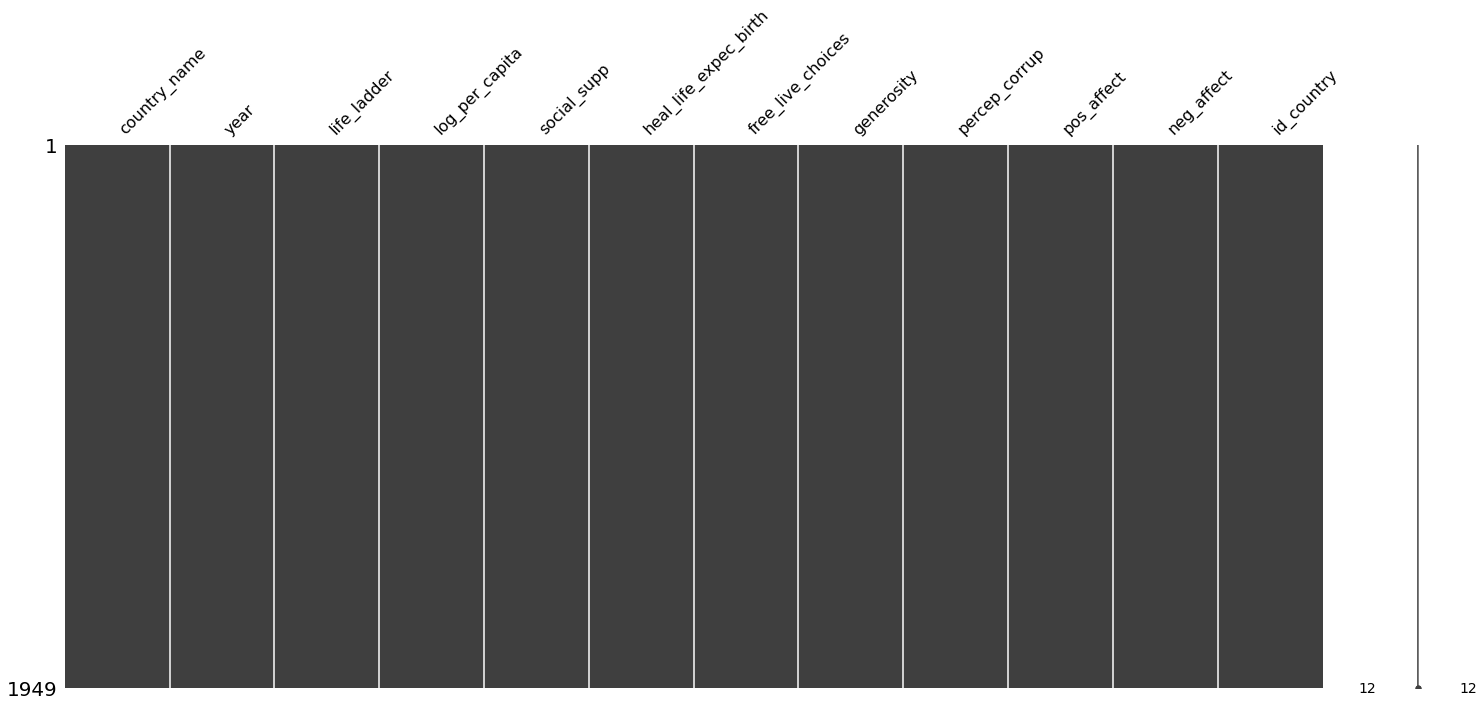

In [11]:
msno.matrix(df) 

In [12]:
df.to_csv('dataOutput/happines_fulldata.csv', encoding='UTF-8', index=False)

# Regresión de dataset sin missing values y dataset con missing values

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split as tts

In [33]:
df_regre = pd.read_csv('../proyect/dataOutput/happines_fulldata.csv')
df_regre = df_regre.rename(columns={'country_name': 'id_country','id_country': 'country_name' })
df_regre

,id_country,year,life_ladder,log_per_capita,social_supp,heal_life_expec_birth,free_live_choices,generosity,percep_corrup,pos_affect,neg_affect,country_name
0,1,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Afghanistan
1,1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Afghanistan
2,1,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Afghanistan
3,1,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Afghanistan
4,1,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...
1944,166,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,Zimbabwe
1945,166,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,Zimbabwe
1946,166,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,Zimbabwe
1947,166,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,Zimbabwe


In [34]:
df_regre = df_regre.drop(columns=['country_name','year'])
df_regre

,id_country,life_ladder,log_per_capita,social_supp,heal_life_expec_birth,free_live_choices,generosity,percep_corrup,pos_affect,neg_affect
0,1,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,1,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,1,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,1,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...
1944,166,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,166,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,166,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,166,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [35]:
corrMatrixM = df_regre.corr()
print(corrMatrixM.log_per_capita.sort_values(axis=0, ascending=True))

percep_corrup           -0.333645
neg_affect              -0.204615
id_country              -0.003195
generosity              -0.000901
pos_affect               0.297011
free_live_choices        0.361404
social_supp              0.682438
life_ladder              0.783824
heal_life_expec_birth    0.834455
log_per_capita           1.000000
Name: log_per_capita, dtype: float64


In [36]:
corrMatrixM.columns

Index(['id_country', 'life_ladder', 'log_per_capita', 'social_supp',
       'heal_life_expec_birth', 'free_live_choices', 'generosity',
       'percep_corrup', 'pos_affect', 'neg_affect'],
      dtype='object')

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifF1 = pd.DataFrame()
vifF1["features"] = df_regre.columns
vifF1["vif_Factor"] = [variance_inflation_factor(df_regre.values, i) for i in range(df_regre.shape[1])]
print(vifF1)

                features  vif_Factor
0             id_country    4.195610
1            life_ladder   95.188962
2         log_per_capita  290.205984
3            social_supp  126.146880
4  heal_life_expec_birth  260.133849
5      free_live_choices   54.610816
6             generosity    1.273274
7          percep_corrup   21.746067
8             pos_affect   79.184612
9             neg_affect   13.157065


In [38]:
df1 = df_regre.drop(columns='log_per_capita')
# df
vifF2 = pd.DataFrame()
vifF2["features"] = df1.columns
vifF2["vif_Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
print(vifF2)

                features  vif_Factor
0             id_country    4.188432
1            life_ladder   86.651846
2            social_supp  115.709237
3  heal_life_expec_birth  149.730629
4      free_live_choices   54.606789
5             generosity    1.255532
6          percep_corrup   21.716776
7             pos_affect   79.076938
8             neg_affect   12.966469


In [39]:
df1 = df1.drop(columns=['heal_life_expec_birth','social_supp','life_ladder','pos_affect'])
# df
vifF3 = pd.DataFrame()
vifF3["features"] = df1.columns
vifF3["vif_Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
print(vifF3)

            features  vif_Factor
0         id_country    3.922945
1  free_live_choices   10.979723
2         generosity    1.139792
3      percep_corrup   14.033157
4         neg_affect   10.581166


In [41]:
df1 = df1.drop(columns='percep_corrup')

vifF4 = pd.DataFrame()
vifF4["features"] = df1.columns
vifF4["vif_Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
print(vifF4)

            features  vif_Factor
0         id_country    3.728587
1  free_live_choices    8.998938
2         generosity    1.050646
3         neg_affect    7.051844


In [42]:
x_new = df_regre.drop(['life_ladder', 'social_supp','heal_life_expec_birth', 'percep_corrup', 'pos_affect'], axis=1)
x_new.shape

(1949, 5)

In [43]:
y = df_regre.log_per_capita 
y.shape

(1949,)

In [44]:
from sklearn.model_selection import train_test_split as tts
# 80% de las observaciones quedan para el conjunto de entrenamiento y 20% para el conjunto de prueba:
x_ent, x_test, y_ent, y_test = tts(x_new, y, train_size=0.8, random_state=42, shuffle=True)
print(x_ent.shape, x_test.shape)
from sklearn.linear_model import LinearRegression #Regresión Lineal con scikit-learn
 
regresion_lineal = LinearRegression()

(1559, 5) (390, 5)


In [45]:
# Crear una instancia y entrenar el modelo con los conjuntos de datos de entrenamiento:
lmI = LinearRegression()
lmI.fit(x_ent, y_ent)

LinearRegression()

a = 1.7763568394002505e-15 y  B = [ 1.39527025e-17  1.00000000e+00 -5.55111512e-17 -7.77156117e-16
  6.66133815e-16]
****************************************
Coeficiente R^2:  1.0
****************************************
Error Cuadrático Medio (MSE) = 3.2403978722155405e-30
Raíz del Error Cuadrático Medio (RMSE) = 1.800110516667113e-15


<AxesSubplot:>

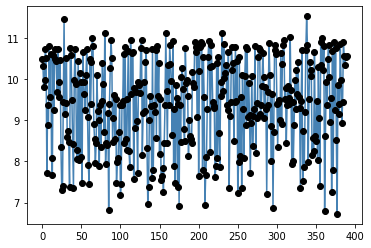

In [46]:
from sklearn.metrics import mean_squared_error
# Coeficientes de la función de regresión:
print('a = ' + str(lmI.intercept_) , 'y  B = ' + str(lmI.coef_) )

# Utilizar el modelo para generar las predicciones:

y_predict = lmI.predict(x_test)

# Verificar el R^2 (sobre el conjunto de test):

print(40*'*')
print('Coeficiente R^2: ', lmI.score(x_test, y_test)) 
print(40*'*')


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')

In [48]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df_regre['log_per_capita'], y =  df_regre['generosity'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.0009009959105203024
P-value:  0.9682914912915512
